# Cross-Validation:

Cross-validation is a powerful technique to assess the generalization ability of machine learning models. Instead of relying on a single train-test split, we use multiple splits to reduce variance in our evaluation.


## Why Not Just a Single Train/Test Split?

- Train/test split is simple, but its results depend heavily on how the data was divided.
- You might get lucky (or unlucky) with a particular split.
- Cross-validation gives a better estimate of model performance on unseen data.


## K-Fold Cross-Validation

- Split the dataset into **K** equal parts ("folds").
- Train the model on **K-1** folds and test on the remaining fold.
- Repeat the process **K** times, each time changing the validation fold.
- Final score = **average** of all K evaluations.

## We'll Apply This To:
- A linear regression model using synthetic data.
- Show how different K values affect evaluation.

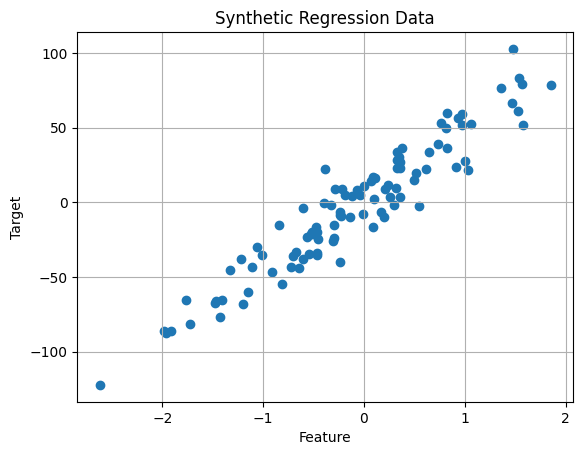

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

plt.scatter(X, y)
plt.title("Synthetic Regression Data")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.grid(True)
plt.show()

In [5]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE (single split) : {mse:.2f}")

MSE (single split) : 234.46


In scikit-learn, scoring functions follow a convention:

Higher score = better performance.
However, Mean Squared Error (MSE) is a loss metric, lower is better.

To maintain consistency with other scoring functions (like accuracy, where higher is better), cross_val_score negates the MSE internally.

In [6]:
# K-fold cross validation

scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
mse_scores = -scores

print(f"Cross-Validation MSE scores (5 folds): {mse_scores}")
print(f"Mean MSE: {mse_scores.mean():.2f}")

Cross-Validation MSE scores (5 folds): [230.19440484 191.26637894 261.95011089 131.29804227 100.0370986 ]
Mean MSE: 182.95


In [7]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    print(f"Fold {fold}: Train size = {len(train_idx)}, Test size = {len(test_idx)}")

Fold 1: Train size = 80, Test size = 20
Fold 2: Train size = 80, Test size = 20
Fold 3: Train size = 80, Test size = 20
Fold 4: Train size = 80, Test size = 20
Fold 5: Train size = 80, Test size = 20


## Applying LOOCV

We'll use `LeaveOneOut()` with `cross_val_score` to evaluate the model using **Negative Mean Squared Error**.


In [8]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

scores = cross_val_score(model, X, y, cv=loo, scoring="neg_mean_squared_error")
mse_scores = -scores


In [9]:
print(f"Number of LOOCV iterations: {len(mse_scores)}")
print(f"Mean MSE across all iterations: {np.mean(mse_scores):.2f}")

Number of LOOCV iterations: 100
Mean MSE across all iterations: 182.49


LOOCV gives an almost unbiased estimate of performance, but at a high computational cost.
- On small datasets like this one, it's practical and gives high-quality feedback on model generalization.
- As dataset size increases, you might prefer **K-Fold CV** for efficiency.

- Cross-validation helps get a more reliable estimate of model performance.
- We used 5-Fold CV to evaluate linear regression.
- Compared to a single train-test split, CV reduces evaluation variance.
- This is especially useful for small datasets or unstable models.
